# Stacked Bar Chart for the oviINr inputs
This notebook goes through the steps of creating a stacked bar chart for connectome data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuprint import Client, fetch_simple_connections

auth_token_file = open("/Users/rhessa/flybrain-clustering/flybrain.auth.txt", 'r')
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:v1.2.1', token=auth_token)
except:
    np_client = None

In [20]:
# Pull in inputr data
ovi_in = pd.read_csv('/Users/rhessa/flybrain-clustering/oviIN/preprocessed_inputs-v1.2.1/preprocessed_nodes.csv')
ovi_in

,id,key,0.0,0.05,0.1,0.5,0.75,1.0,instance,celltype,...,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,1003215282,1,1,1,1,1,1,1,CL229_R,CL229,...,Traced,False,Roughly traced,PDM19,301.0,"[23044, 14981, 11600]","{'INP': {'pre': 87, 'post': 351, 'downstream':...",NaN,"['EPA(R)', 'GOR(R)', 'IB', 'ICL(R)', 'INP', 'S...","['GOR(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
1,1005952640,2,2,1,1,2,2,2,IB058_R,IB058,...,Traced,False,Roughly traced,PVL20,NaN,NaN,"{'INP': {'pre': 464, 'post': 1327, 'downstream...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S..."
2,1006928515,3,1,1,1,3,3,3,CL300_R,CL300,...,Traced,False,Roughly traced,PVL13,236.0,"[12083, 10523, 16816]","{'INP': {'pre': 79, 'post': 126, 'downstream':...",NaN,"['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S...","['ATL(R)', 'IB', 'ICL(R)', 'INP', 'SCL(R)', 'S..."
3,1007260806,4,2,1,1,4,4,4,CL301_R,CL301,...,Traced,False,Roughly traced,PVL13,236.0,"[13524, 10108, 16480]","{'INP': {'pre': 40, 'post': 128, 'downstream':...",NaN,"['GOR(R)', 'IB', 'ICL(R)', 'INP', 'PLP(R)', 'S...","['IB', 'ICL(R)', 'INP', 'PLP(R)', 'SCL(R)', 'S..."
4,1008024276,5,3,2,2,5,5,5,FB5N_R,FB5N,...,Traced,False,Roughly traced,AVM08,472.5,"[19178, 29711, 37312]","{'SNP(L)': {'post': 5, 'upstream': 5, 'mito': ...",SMPCREFB5_4,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,987273073,2507,3,8,8,409,604,629,(PVL05)_L,NaN,...,Traced,False,Roughly traced,NaN,NaN,NaN,"{'SNP(R)': {'pre': 65, 'post': 52, 'downstream...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'..."
2507,987842109,2508,3,9,23,533,780,815,NaN,NaN,...,Orphan,NaN,Orphan hotknife,NaN,NaN,NaN,"{'SNP(R)': {'pre': 2, 'post': 13, 'downstream'...",NaN,"['SMP(R)', 'SNP(R)']","['SMP(R)', 'SNP(R)']"
2508,988567837,2509,2,3,4,16,58,63,FB4G_R,FB4G,...,Traced,False,Roughly traced,AVM08,NaN,NaN,"{'SNP(R)': {'pre': 6, 'post': 73, 'downstream'...",CRELALFB4_3,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F..."
2509,988909130,2510,2,3,4,389,559,572,FB5V_R,FB5V,...,Traced,False,Roughly traced,AVM10,296.5,"[13226, 32024, 18600]","{'SNP(R)': {'pre': 1, 'post': 28, 'downstream'...",CRELALFB5,"['AB(R)', 'CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX',...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'CX', 'FB', 'F..."


In [21]:
# body IDs of oviINs from Neuprint
oviINr_bodyID = 423101189
oviINl_bodyID = 485934965

# inputs to oviINr
ovi_inputs = fetch_simple_connections(None,oviINr_bodyID)
ovi_inputs

,bodyId_pre,bodyId_post,weight,type_pre,type_post,instance_pre,instance_post,conn_roiInfo
0,611015907,423101189,287,SMP176,oviIN,SMP176_R,oviIN_R,"{'INP': {'pre': 54, 'post': 53}, 'CRE(R)': {'p..."
1,5813087891,423101189,255,SMP544,oviIN,SMP544_R,oviIN_R,"{'LX(R)': {'pre': 66, 'post': 65}, 'LAL(R)': {..."
2,1598011458,423101189,243,LAL134,oviIN,LAL134_R,oviIN_R,"{'LX(R)': {'pre': 42, 'post': 42}, 'LAL(R)': {..."
3,5813022375,423101189,236,IB017,oviIN,IB017_R,oviIN_R,"{'SNP(R)': {'pre': 97, 'post': 97}, 'SMP(R)': ..."
4,448342846,423101189,225,CRE075,oviIN,CRE075_R,oviIN_R,"{'INP': {'pre': 199, 'post': 199}, 'CRE(R)': {..."
...,...,...,...,...,...,...,...,...
2519,5901221890,423101189,1,SLP422,oviIN,SLP422_R,oviIN_R,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SMP(R)': {'..."
2520,5901226036,423101189,1,None,oviIN,None,oviIN_R,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SMP(R)': {'..."
2521,5901230025,423101189,1,None,oviIN,None,oviIN_R,"{'VMNP': {'pre': 1, 'post': 1}, 'VES(R)': {'pr..."
2522,5901231318,423101189,1,None,oviIN,None,oviIN_R,"{'SNP(L)': {'pre': 1, 'post': 1}, 'SMP(L)': {'..."


In [22]:
# grab only necessary columns
ovi_inputs_f = ovi_inputs[['bodyId_pre','type_pre','weight']]  

ovi_inputs_f

,bodyId_pre,type_pre,weight
0,611015907,SMP176,287
1,5813087891,SMP544,255
2,1598011458,LAL134,243
3,5813022375,IB017,236
4,448342846,CRE075,225
...,...,...,...
2519,5901221890,SLP422,1
2520,5901226036,None,1
2521,5901230025,None,1
2522,5901231318,None,1


In [30]:
# Find the top 20 inputs to oviINr
ovi_inputs_filter = ovi_inputs[['type_pre','weight']]  

# collapse ovi_inputs by cell type and sort in descending order
ovi_inputs_top = ovi_inputs_filter.groupby('type_pre', as_index=False).sum().sort_values(by='weight', ascending=False,ignore_index=True)
# filter out cell types with less than 10 inputs
ovi_inputs_final = ovi_inputs_top[ovi_inputs_top['weight'] >= 100]

ovi_inputs_final

,type_pre,weight
0,FS1A,892
1,IB017,370
2,SMP052,361
3,SMP176,299
4,FC2B,290
5,SMP383,281
6,SMP544,259
7,LAL134,247
8,SMP550,234
9,CRE075,225


In [23]:
# Merge weights onto ovi_in
ovi_in_merged = pd.merge(ovi_in, ovi_inputs_f, how='left', left_on='id', right_on='bodyId_pre')

In [35]:
ovi_in_merged[ovi_in_merged['celltype']=='FS1A']

,id,key,0.0,0.05,0.1,0.5,0.75,1.0,instance,celltype,...,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois,bodyId_pre,type_pre,weight
26,1014102651,27,3,2,2,5,5,20,FS1A(FQ9)_C2_L,FS1A,...,PDM01,301.0,"[26807, 16994, 11456]","{'SNP(R)': {'pre': 45, 'post': 34, 'downstream...",FB2-6SMPSMP,"['CRE(-RUB)(L)', 'CRE(L)', 'CX', 'FB', 'FB-col...","['CRE(-RUB)(L)', 'CRE(L)', 'CX', 'FB', 'FB-col...",1014102651,FS1A,16
28,1014223948,29,3,2,2,5,5,20,FS1A(FQ9)_C2_R,FS1A,...,PDM04,291.5,"[18950, 10470, 18776]","{'SNP(L)': {'pre': 36, 'post': 43, 'downstream...",FB2-6SMPSMP,"['CRE(-RUB)(L)', 'CRE(L)', 'CX', 'FB', 'FB-col...","['CRE(-RUB)(L)', 'CRE(L)', 'INP', 'SMP(L)', 'S...",1014223948,FS1A,19
30,1014461486,31,3,2,2,5,5,20,FS1A(FQ9)_C3_L,FS1A,...,PDM01,291.0,"[28899, 16232, 12088]","{'SNP(R)': {'pre': 37, 'post': 23, 'downstream...",FB2-6SMPSMP,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...",1014461486,FS1A,17
31,1014465452,32,3,2,2,5,5,10,FS1A(FQ9)_C3_L,FS1A,...,PDM01,291.0,"[28255, 16569, 12008]","{'SNP(L)': {'pre': 25, 'post': 28, 'downstream...",FB2-6SMPSMP,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...",1014465452,FS1A,22
32,1014465588,33,3,2,2,5,5,23,FS1A(FQ9)_C9_L,FS1A,...,PDM04,245.0,"[33446, 11602, 19792]","{'SNP(R)': {'pre': 49, 'post': 31, 'downstream...",FB2-6SMPSMP,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...",1014465588,FS1A,19
33,1014465666,34,3,2,2,5,5,24,FS1A(FQ9)_C9_L,FS1A,...,PDM04,300.0,"[33748, 11191, 19440]","{'SNP(R)': {'pre': 45, 'post': 37, 'downstream...",FB2-6SMPSMP,"['CRE(-RUB)(L)', 'CRE(L)', 'CX', 'FB', 'FBl2',...","['CRE(-RUB)(L)', 'CRE(L)', 'CX', 'FB', 'FBl4',...",1014465666,FS1A,10
34,1014474192,35,3,2,2,5,5,20,FS1A(FQ9)_C2_L,FS1A,...,PDM01,301.0,"[27300, 17574, 10448]","{'SNP(L)': {'pre': 31, 'post': 18, 'downstream...",FB2-6SMPSMP,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...",1014474192,FS1A,19
57,1039063931,58,3,2,2,5,5,39,FS1A(FQ9)_C5_R,FS1A,...,PDM02,301.0,"[19582, 14276, 13168]","{'SNP(R)': {'pre': 28, 'post': 21, 'downstream...",FB2-6SMPSMP,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...",1039063931,FS1A,22
59,1039085109,60,3,2,2,5,5,40,FS1A(FQ9)_C6_R,FS1A,...,PDM02,301.0,"[22191, 15842, 11760]","{'CX': {'post': 795, 'upstream': 795, 'mito': ...",FB2-6SMPSMP,"['CRE(-RUB)(L)', 'CRE(L)', 'CX', 'FB', 'FBl2',...","['CRE(-RUB)(L)', 'CRE(L)', 'INP', 'SMP(L)', 'S...",1039085109,FS1A,17
61,1039426238,62,3,2,2,5,5,41,FS1A(FQ9)_C5_R,FS1A,...,PDM02,301.0,"[20257, 14057, 12736]","{'CX': {'pre': 1, 'post': 475, 'downstream': 8...",FB2-6SMPSMP,"['CRE(-RUB)(L)', 'CRE(L)', 'CX', 'FB', 'FBl2',...","['CRE(-RUB)(L)', 'CRE(L)', 'CX', 'FB', 'FBl6',...",1039426238,FS1A,17


In [38]:
# Pivot the dataframe for celltype with no values
ovi_in_pivot = ovi_in_merged.pivot(index='celltype', columns='0.0', values=count)
ovi_in_pivot

NameError: name 'count' is not defined

In [28]:
ovi_in_pivot

0.0,1,2,3,4,5
celltype,,,,,
5-HTPMPD01,0.0,0.0,0.0,0.0,3.0
5-HTPMPV01,3.0,0.0,0.0,0.0,0.0
5-HTPMPV03,1.0,0.0,0.0,0.0,0.0
AOTU003,0.0,1.0,0.0,0.0,0.0
AOTU008_a,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
pC1d,0.0,109.0,0.0,31.0,0.0
pC1e,0.0,148.0,0.0,0.0,0.0
v2LN37,0.0,4.0,0.0,0.0,0.0


In [39]:
#Filter celltypes for those in ovi_inputs_final
ovi_in_pivot = ovi_in_pivot[ovi_in_pivot.index.isin(ovi_inputs_final['type_pre'])]
ovi_in_pivot

0.0,1,2,3,4,5
celltype,,,,,
CRE075,0.0,225.0,0.000000,0.0,0.0
CRE077,0.0,0.0,133.000000,0.0,0.0
FC2B,0.0,0.0,17.058824,0.0,0.0
FC2C,0.0,0.0,8.473684,0.0,0.0
FS1A,0.0,0.0,20.272727,0.0,0.0
IB017,0.0,236.0,0.000000,134.0,0.0
LAL022,0.0,61.5,41.000000,0.0,0.0
LAL134,0.0,243.0,0.000000,4.0,0.0
OA-VUMa7,0.0,0.0,103.000000,0.0,0.0


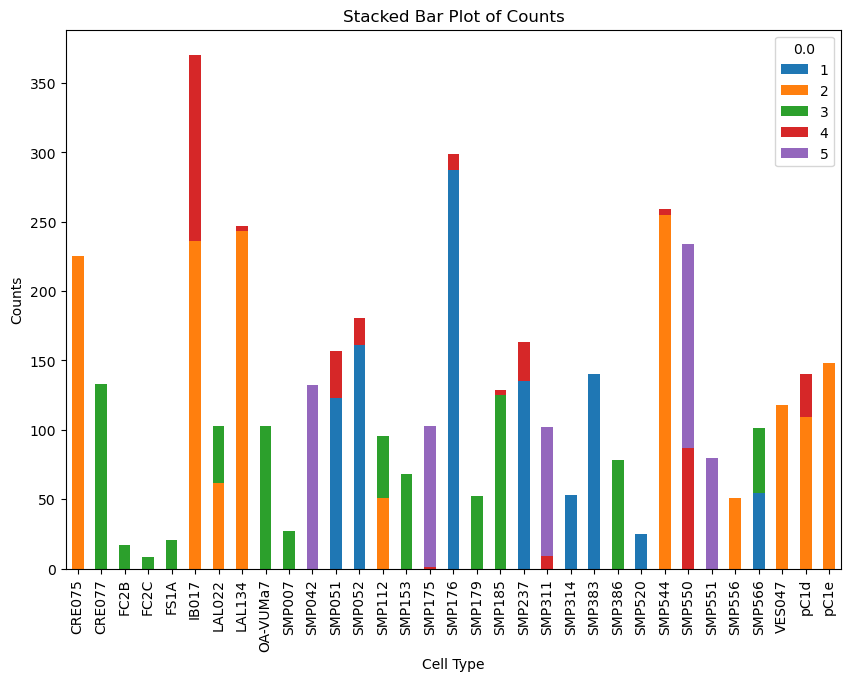

In [33]:
# Plot the stacked bar chart
ovi_in_pivot.plot(kind='bar', stacked=True, figsize=(10,7))

plt.title('Stacked Bar Plot of Counts')
plt.xlabel('Cell Type')
plt.ylabel('Counts')
plt.show()